# Logistic Regression

Import packages and read data.

In [389]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## load iris data from file
#Location = r'data\IrisData.csv'
#df = pd.read_csv(Location)

# load iris data by scikit-learn function 
from sklearn import datasets
iris = datasets.load_iris()

Feature matrix and target value
- $\mathbf{X}$: petal length and petal width
- $y$: 0,1,2 (setosa, vergicolor, verginica)  

Note: `np.unique(y)` would return the different class labels stores in `iris.target`.  
The target values are stored as integers.

In [390]:
X = iris.data[:, [2,3]]
y = iris.target

In [391]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1]-X[:,1].mean())/X[:,1].std()

In [208]:
X_bin = X_std[50:150]
y_bin = y[50:150]-1

## 1. Linear Regression vs. Logistic Regression
### Linear Regression

In [209]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_bin[:,0].reshape(-1,1), X_bin[:,1].reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

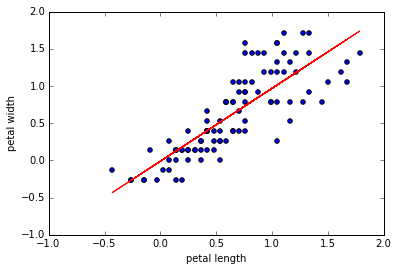

In [210]:
# put the plots together
plt.scatter(X_bin[:,0], X_bin[:,1])
plt.plot(X_bin[:,0], linreg.predict(X_bin[:,0].reshape(-1,1)), color='red')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

### Linear Regression for Classification

In [211]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
lincls = LinearRegression()
lincls.fit(X_bin[:,0].reshape(-1,1), y_bin)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

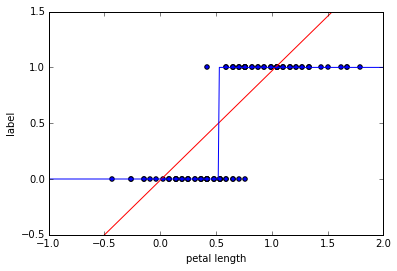

In [212]:
mesh = np.arange(-3,3,0.01).reshape(-1,1)

plt.scatter(X_bin[:,0], y_bin)
plt.plot(mesh, linreg.predict(mesh), color='red')
plt.plot(mesh, np.where(linreg.predict(mesh)>=0.5,1,0), color='blue')

plt.xlabel('petal length')
plt.ylabel('label')
plt.xlim(-1,2)
plt.ylim(-0.5,1.5)
plt.show()

### Logistic Regression for Classification

Train a logistic regression model with scikit-learn

In [213]:
# fit a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_bin[:,0].reshape(-1,1), y_bin)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

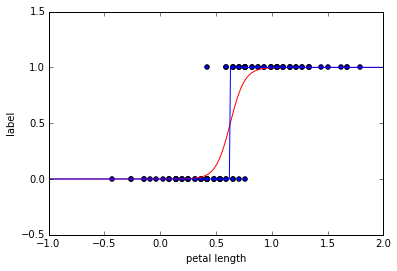

In [214]:
mesh = np.arange(-3,3,0.01).reshape(-1,1)

plt.scatter(X_bin[:,0], y_bin)
plt.plot(mesh, lr.predict_proba(mesh)[:,1], color='red')
plt.plot(mesh, np.where(lr.predict(mesh)>=0.5,1,0), color='blue')

plt.xlabel('petal length')
plt.ylabel('label')
plt.xlim(-1,2)
plt.ylim(-0.5,1.5)
plt.show()

## EXERCISE: Another dataset

In [379]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort('al', inplace=True)

# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0,0.16,1,0


### Linear Regression

In [380]:
## TODO_11: fit a linear regression model for GLASS dataset
X1 = glass['al'].reshape(-1,1)
X2 = glass['ri'].reshape(-1,1)
y = glass['household'].reshape(-1,1)

from sklearn.linear_model import LinearRegression
lincls1 = LinearRegression()
lincls1.fit(X1, X2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

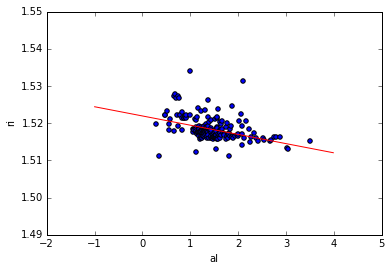

In [381]:
## TODO_12: plot
mesh = np.arange(-1,4,0.01).reshape(-1,1)

plt.scatter(X1, X2)
plt.plot(mesh, lincls1.predict(mesh), color='red')

plt.xlabel('al')
plt.ylabel('ri')
#plt.xlim(-1,2)
#plt.ylim(-0.5,1.5)
plt.show()

### Linear Regression for Classification

In [382]:
## TODO_13: fit a linear regression model for GLASS dataset
y = glass['household'].reshape(-1,1)

from sklearn.linear_model import LinearRegression
lincls2 = LinearRegression()
lincls2.fit(X1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

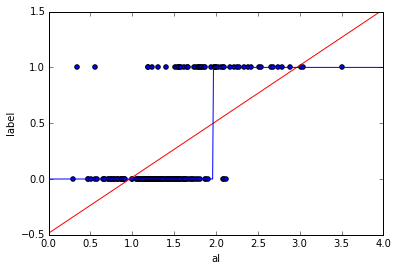

In [387]:
## TODO_14: plot
mesh = np.arange(-1,4,0.01).reshape(-1,1)

plt.scatter(X1, y)
plt.plot(mesh, lincls2.predict(mesh), color='red')
plt.plot(mesh, np.where(lincls2.predict(mesh)>=0.5,1,0), color='blue')

plt.xlabel('al')
plt.ylabel('label')
plt.xlim(0,4)
plt.ylim(-0.5,1.5)
plt.show()

### Logistic Regression for Classification

Train a logistic regression model with scikit-learn

In [332]:
## TODO_15: fit a logistic regression model


LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

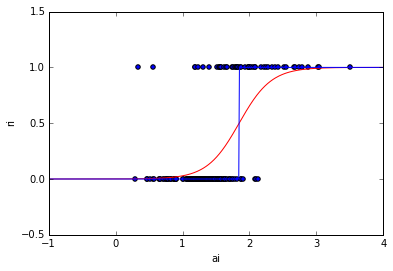

In [333]:
## TODO_16: plot


## 2. Interpretation of Logistic Regression
### Probability, odds, e, log, log-odds

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

In [362]:
## TODO_21: create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1-table.probability)
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


In [198]:
# exponential function: e^1
np.exp(1)

2.7182818284590451

In [199]:
# time needed to grow 1 unit to 2.718 units
np.log(2.718)

0.99989631572895199

In [200]:
np.log(np.exp(5))

5.0

### Interpretation of Logistic Regression

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.

Probability is sometimes written as pi:

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the **logistic function**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

We have covered how this works for **binary classification problems** (two response classes). But what about **multi-class classification problems** (more than two response classes)?

- Most common solution for classification models is **"one-vs-all"** (also known as **"one-vs-rest"**): decompose the problem into multiple binary classification problems
- **Multinomial logistic regression** can solve this as a single problem

### Logistic Regression Coefficients

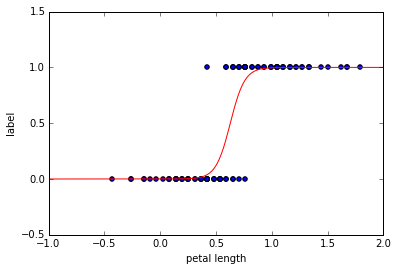

In [257]:
# plot the predicted probabilities again
mesh = np.arange(-3,3,0.01).reshape(-1,1)

plt.scatter(X_bin[:,0], y_bin)
plt.plot(mesh, lr.predict_proba(mesh)[:,1], color='red')

plt.xlabel('petal length')
plt.ylabel('label')
plt.xlim(-1,2)
plt.ylim(-0.5,1.5)
plt.show()

In [267]:
# compute predicted log-odds for petal_length=0.5 using the equation
logodds = lr.intercept_ + lr.coef_[0] * 0.5
logodds

array([-1.98522313])

In [268]:
## TODO_22: convert log-odds to odds
odds = ##
odds

array([ 0.13734996])

In [269]:
## TODO_23: convert odds to probability
prob = ##
prob

array([ 0.12076315])

In [271]:
# compute predicted probability for petal_length=0.5 using the predict_proba method
lr.predict_proba(0.5)[:, 1]

array([ 0.12076315])

In [272]:
# examine the coefficient for petal_length
zip(feature_cols, lr.coef_[0])

[('petal_length', 15.492018815940812)]

**Interpretation:** A 1 unit increase in 'al' is associated with a 15.5 unit increase in the log-odds of 'household'.

In [273]:
## TODO_24: increasing petal_length by 1 (so that petal_length=1.5) increases the log-odds by 15.5
logodds = -1.98522313 + 15.492018815940812
odds = ##
prob = ##
prob

0.99999863832779035

In [274]:
# compute predicted probability for al=3 using the predict_proba method
lr.predict_proba(1.5)[:, 1]

array([ 0.99999864])

**Bottom line:** Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [275]:
# examine the intercept
lr.intercept_

array([-9.73123254])

**Interpretation:** For an 'petal_length' value of 0, the log-odds of 'household' is -9.73.

In [276]:
## TODO_25: convert log-odds to probability
logodds = lr.intercept_
odds = ##
prob = ##
prob

array([  5.93955095e-05])

That makes sense from the plot above, because the probability of household=1 should be very low for such a low 'petal_length' value.

## 3. Logistic Regression - Multi-Dimensional

[Examples and codes are from: Python Machine Learning, S. Raschka, PACKT publishing, 2016]
- In logistic regression, fit a linear function to logit function.
- For two class case, ${{p_1}\over{1-p_1}} = w_0+\mathbf{w}^T\mathbf{x}$, where $p_1=P(Y=\omega_1|\mathbf{x})$
- In fitting the linear model, the objective function is minimized with regularization.

Split the dataset into separate training and test datasets.
Randomly split the $\mathbf{x}$ and $y$ arrays into
   1. 30% test data (45 samples) and  
   1. 70% training data (105 samples).

In [187]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, ax=None):
    
    if ax is None:
        ax = plt.gca()
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]
            
        ax.scatter(X_test[:, 0],
                   X_test[:, 1],
                   c='',
                   alpha=1.0,
                   linewidths=1,
                   marker='o',
                   s=55, label='test set')

In [369]:
from sklearn.cross_validation import train_test_split

X_train_std, X_test_std, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [370]:
# fit a logistic regression model
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(C=1000.0, random_state=0)
lr2.fit(X_std, y)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

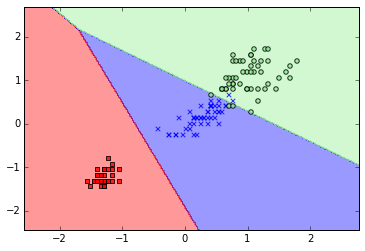

In [373]:
## TODO_31: Plot 2D graph using plot_decision_regions
plot_decision_regions(X_std, y, lr2)
#plot_decision_regions(X_combined_std, y_combined, lr2, test_idx=(105,150))

Predict the probability of a pattern in the test set.

In [395]:
(lr2.predict_proba(X_test_std[0,:].reshape(1, -1)),
lr3.predict_proba(X_test_std[0,:].reshape(1, -1)))

(array([[  4.85739831e-12,   7.50949996e-02,   9.24905000e-01]]),
 array([[ 0.028266  ,  0.32170222,  0.65003178]]))

In [375]:
lr2.predict_proba(X_test_std[21,:].reshape(1,-1))

array([[  6.05927998e-07,   9.32675592e-01,   6.73238017e-02]])

See the effect of regularization strength, which is controlled by $C$.

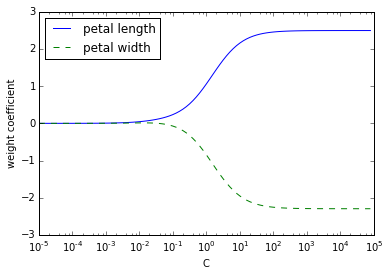

In [376]:
weights, params = [], []
for c in np.arange(-5, 5, 0.1):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('./figures/regression_path.png', dpi=300)"
plt.show()

Question: What is the test (prediction) results when $C$ is very small?

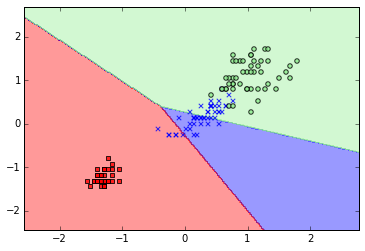

In [393]:
## TODO_32: Plot 2D graph using plot_decision_regions when C = 0.1, 1, 10

# fit a logistic regression model
from sklearn.linear_model import LogisticRegression
lr3 = LogisticRegression(C=0.1, random_state=0)
lr3.fit(X_std, y)

## TODO_31: Plot 2D graph using plot_decision_regions
plot_decision_regions(X_std, y, lr3)
#plot_decision_regions(X_combined_std, y_combined, lr2, test_idx=(105,150))

## 4. Logistic Regression - Categorical input

Logistic regression can still be used with **categorical features**. Let's see what that looks like:

In [399]:
# create a categorical feature
glass['high_ba'] = np.where(glass.ba > 0.5, 1, 0)

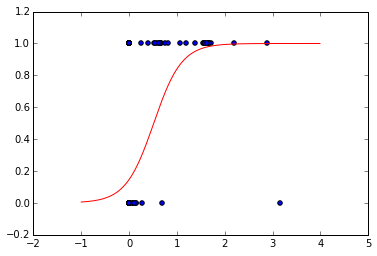

In [400]:
## TODO_41: add logistic regression curve on the graph
lr41 = LogisticRegression(C=1000, random_state=0)
lr41.fit(glass['ba'].reshape(-1,1), glass['household'])

mesh = np.arange(-1,4,0.01).reshape(-1,1)

plt.plot(mesh, lr41.predict_proba(mesh)[:,1], color='red')

# original (continuous) feature
plt.scatter(glass['ba'], glass['household'])
plt.show()

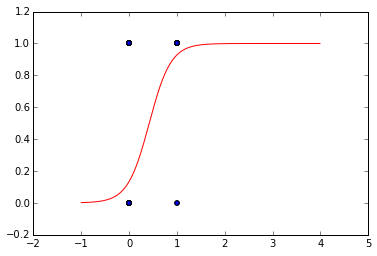

In [401]:
## TODO_42: add logistic regression curve on the graph
lr42 = LogisticRegression(C=1000, random_state=0)
lr42.fit(glass['high_ba'].reshape(-1,1), glass['household'])

mesh = np.arange(-1,4,0.01).reshape(-1,1)

plt.plot(mesh, lr42.predict_proba(mesh)[:,1], color='red')


# categorical feature
plt.scatter(glass['high_ba'], glass['household'])
plt.show()

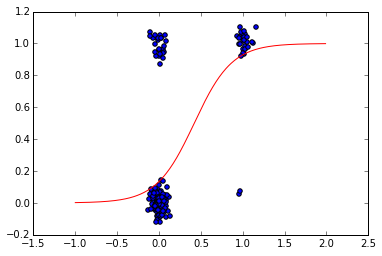

In [321]:
# fit a logistic regression model
feature_cols = ['high_ba']
X = glass['high_ba']+np.random.normal(0,0.05,glass['high_ba'].shape)
y = glass['household']+np.random.normal(0,0.05,glass['household'].shape)

lr4 = LogisticRegression(C=1000, random_state=0)
lr4.fit(glass['high_ba'].reshape(-1,1), glass['household'])

mesh = np.arange(-1,2,0.01).reshape(-1,1)

plt.plot(mesh, lr4.predict_proba(mesh)[:,1], color='red')

# categorical feature, with jitter added
plt.scatter(X, y)
plt.show()

## 5. Comparing Logistic Regression with Other Models

Advantages of logistic regression:

- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Can't automatically learn feature interactions

Automatically created module for IPython interactive environment


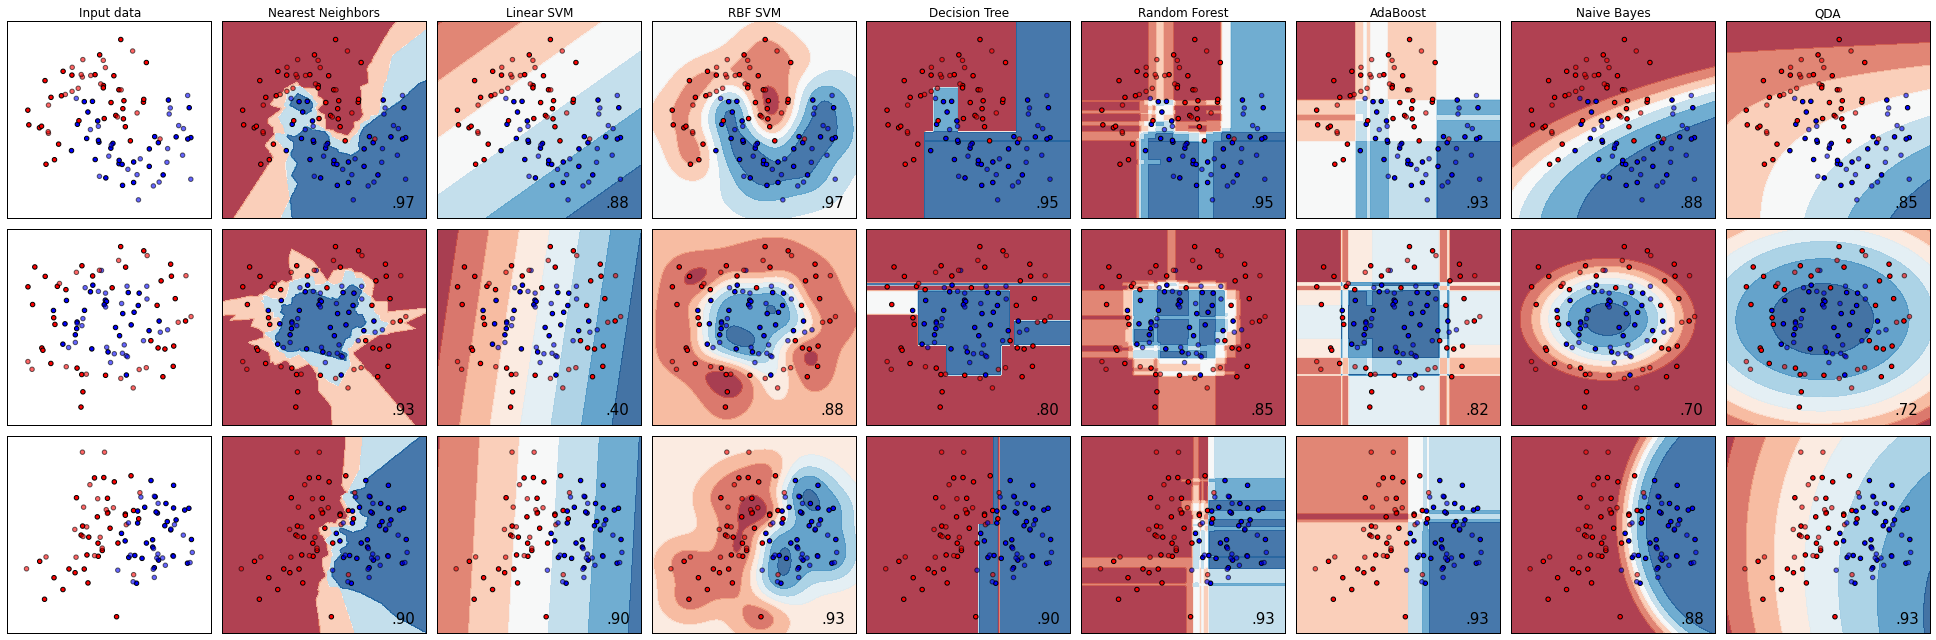

In [335]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## 6. Build your own logistic regression algorithm

In [337]:
'''
Parameters
------------
eta : float
    Learning rate (between 0.0 and 1.0)
n_iter : int
    Passes over the training dataset.

Attributes
-----------
w_ : 1d-array
    Weights after fitting.
cost_ : list
    Cost in every epoch.
'''
def __init__(self, eta=0.01, n_iter=50):
    self.eta = eta
    self.n_iter = n_iter

def fit(self, X, y):
    ''' Fit training data.

    Parameters
    ----------
    X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target values.

    Returns
    -------
    self : object

    '''
    self.w_ = np.zeros(1 + X.shape[1])
    self.cost_ = []       
    for i in range(self.n_iter):
        y_val = self.activation(X)
        errors = (y - y_val)
        neg_grad = X.T.dot(errors)
        self.w_[1:] += ## TODO
        self.w_[0] += ## TODO
        self.cost_.append(self._logit_cost(y, self.activation(X)))
    return self

def _logit_cost(self, y, y_val):
    logit = ## TODO
    return logit

def _sigmoid(self, z):
    return ## TODO

def net_input(self, X):
    ## Calculate net input
    return ## TODO

def activation(self, X):
    ## Activate the logistic neuron
    z = self.net_input(X)
    return self._sigmoid(z)

def predict_proba(self, X):
    """
    Predict class probabilities for X.

    Parameters
    ----------
    X : {array-like, sparse matrix}, shape = [n_samples, n_features]
        Training vectors, where n_samples is the number of samples and
        n_features is the number of features.

    Returns
    ----------
      Class 1 probability : float

    """
    return activation(X)

def predict(self, X):
    """
    Predict class labels for X.

    Parameters
    ----------
    X : {array-like, sparse matrix}, shape = [n_samples, n_features]
        Training vectors, where n_samples is the number of samples and
        n_features is the number of features.

    Returns
    ----------
    class : int
        Predicted class label.

    """
    # equivalent to np.where(self.activation(X) >= 0.5, 1, 0)
    return np.where(self.net_input(X) >= 0.0, 1, 0)